# Overfitting and Underfitting

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os
print(tf.__version__)

1.12.0


In [2]:
NUM_WORDS = 10000
# 下载包含总计 100000 个词的 imdb
(train_data,train_label),(test_data,test_label) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences,dims):
    # 内存消耗很大，建议先关掉其他 nootbook
    results = np.zeros((len(sequences),dims))
    for i,word_index in enumerate(sequences):
        results[i,word_index] = 1.0
    return results


In [3]:
train_data = multi_hot_sequences(train_data,NUM_WORDS)
test_data = multi_hot_sequences(test_data,NUM_WORDS)

25000


In [4]:
print(train_data[0])

[0. 1. 1. ... 0. 0. 0.]


In [7]:
import sys
print(sys.getsizeof(train_data))
print(sys.getsizeof(test_data))
print(len(test_data))

2000000112
2000000112
25000


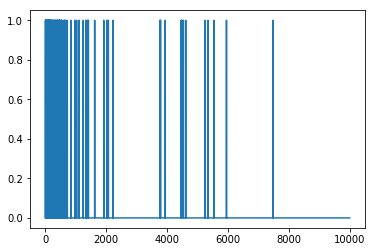

In [8]:
plt.plot(train_data[0])

## 过拟合 

### 基准模型 

In [11]:
def build_baseline_model():
    # 隐藏层每层16个神经元
    model = keras.Sequential([
        keras.layers.Dense(16,activation = tf.nn.relu,input_shape=(NUM_WORDS,)),
        keras.layers.Dense(16,activation=tf.nn.relu),
        keras.layers.Dense(1,activation=tf.nn.sigmoid)
    ])
    
    model.compile(optimizer="adam",
                 loss="binary_crossentropy",
                 metrics=['accuracy', 'binary_crossentropy'])
    return model

In [12]:
baseline_model = build_baseline_model()
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
baseline_history = baseline_model.fit(train_data,train_label,epochs=20,batch_size=512,validation_data=(test_data,test_label),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 11s - loss: 0.4669 - acc: 0.8111 - binary_crossentropy: 0.4669 - val_loss: 0.3211 - val_acc: 0.8782 - val_binary_crossentropy: 0.3211
Epoch 2/20
 - 5s - loss: 0.2373 - acc: 0.9138 - binary_crossentropy: 0.2373 - val_loss: 0.2831 - val_acc: 0.8884 - val_binary_crossentropy: 0.2831
Epoch 3/20
 - 4s - loss: 0.1751 - acc: 0.9392 - binary_crossentropy: 0.1751 - val_loss: 0.2929 - val_acc: 0.8835 - val_binary_crossentropy: 0.2929
Epoch 4/20
 - 4s - loss: 0.1396 - acc: 0.9528 - binary_crossentropy: 0.1396 - val_loss: 0.3204 - val_acc: 0.8787 - val_binary_crossentropy: 0.3204
Epoch 5/20
 - 5s - loss: 0.1153 - acc: 0.9624 - binary_crossentropy: 0.1153 - val_loss: 0.3473 - val_acc: 0.8740 - val_binary_crossentropy: 0.3473
Epoch 6/20
 - 5s - loss: 0.0930 - acc: 0.9724 - binary_crossentropy: 0.0930 - val_loss: 0.3798 - val_acc: 0.8688 - val_binary_crossentropy: 0.3798
Epoch 7/20
 - 5s - loss: 0.0747 - acc: 0.9799 - binary_crossentropy

### 较小模型 

In [14]:
def build_smaller_model():
    # 隐藏层每层4个神经元
    model = keras.Sequential([
        keras.layers.Dense(4,activation = tf.nn.relu,input_shape=(NUM_WORDS,)),
        keras.layers.Dense(4,activation=tf.nn.relu),
        keras.layers.Dense(1,activation=tf.nn.sigmoid)
    ])
    
    model.compile(optimizer="adam",
                 loss="binary_crossentropy",
                 metrics=['accuracy', 'binary_crossentropy'])
    return model

In [15]:
smaller_model = build_smaller_model()
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [16]:
smaller_history = smaller_model.fit(train_data,train_label,epochs=20,batch_size=512,validation_data=(test_data,test_label),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.4902 - acc: 0.8002 - binary_crossentropy: 0.4902 - val_loss: 0.3625 - val_acc: 0.8712 - val_binary_crossentropy: 0.3625
Epoch 2/20
 - 5s - loss: 0.2757 - acc: 0.9053 - binary_crossentropy: 0.2757 - val_loss: 0.2986 - val_acc: 0.8844 - val_binary_crossentropy: 0.2986
Epoch 3/20
 - 4s - loss: 0.2078 - acc: 0.9303 - binary_crossentropy: 0.2078 - val_loss: 0.2847 - val_acc: 0.8870 - val_binary_crossentropy: 0.2847
Epoch 4/20
 - 5s - loss: 0.1711 - acc: 0.9440 - binary_crossentropy: 0.1711 - val_loss: 0.2904 - val_acc: 0.8836 - val_binary_crossentropy: 0.2904
Epoch 5/20
 - 5s - loss: 0.1473 - acc: 0.9543 - binary_crossentropy: 0.1473 - val_loss: 0.3023 - val_acc: 0.8796 - val_binary_crossentropy: 0.3023
Epoch 6/20
 - 4s - loss: 0.1290 - acc: 0.9610 - binary_crossentropy: 0.1290 - val_loss: 0.3137 - val_acc: 0.8773 - val_binary_crossentropy: 0.3137
Epoch 7/20
 - 5s - loss: 0.1138 - acc: 0.9678 - binary_crossentropy:

### 更大的模型 

In [17]:
def build_bigger_model():
    # 隐藏层每层512个神经元
    model = keras.Sequential([
        keras.layers.Dense(512,activation = tf.nn.relu,input_shape=(NUM_WORDS,)),
        keras.layers.Dense(512,activation=tf.nn.relu),
        keras.layers.Dense(1,activation=tf.nn.sigmoid)
    ])
    
    model.compile(optimizer="adam",
                 loss="binary_crossentropy",
                 metrics=['accuracy', 'binary_crossentropy'])
    return model

In [18]:
bigger_model = build_bigger_model()
bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [19]:
bigger_history = bigger_model.fit(train_data,train_label,epochs=20,batch_size=512,validation_data=(test_data,test_label),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 17s - loss: 0.3466 - acc: 0.8500 - binary_crossentropy: 0.3466 - val_loss: 0.2934 - val_acc: 0.8818 - val_binary_crossentropy: 0.2934
Epoch 2/20
 - 15s - loss: 0.1383 - acc: 0.9500 - binary_crossentropy: 0.1383 - val_loss: 0.3492 - val_acc: 0.8647 - val_binary_crossentropy: 0.3492
Epoch 3/20
 - 15s - loss: 0.0448 - acc: 0.9874 - binary_crossentropy: 0.0448 - val_loss: 0.4392 - val_acc: 0.8667 - val_binary_crossentropy: 0.4392
Epoch 4/20
 - 15s - loss: 0.0074 - acc: 0.9989 - binary_crossentropy: 0.0074 - val_loss: 0.5975 - val_acc: 0.8717 - val_binary_crossentropy: 0.5975
Epoch 5/20
 - 15s - loss: 9.9175e-04 - acc: 1.0000 - binary_crossentropy: 9.9175e-04 - val_loss: 0.6856 - val_acc: 0.8723 - val_binary_crossentropy: 0.6856
Epoch 6/20
 - 15s - loss: 2.2391e-04 - acc: 1.0000 - binary_crossentropy: 2.2391e-04 - val_loss: 0.7274 - val_acc: 0.8714 - val_binary_crossentropy: 0.7274
Epoch 7/20
 - 15s - loss: 1.3267e-04 - acc: 1.

### 绘制训练损失和验证损失图表 

In [24]:
def plot_history(historys,key="binary_crossentropy"):
    plt.figure(figsize=(20,10))
    
    for name,history in historys:
        # 同个模型，相同颜色
        val = plt.plot(history.epoch,history.history['val_'+key],'--',label=name+" val")
        plt.plot(history.epoch,history.history[key],label=name+" train",color=val[0].get_color())
    plt.xlabel("Epochs")
    plt.ylabel(key.replace('_','').title())
    plt.xlim([0,max(history.epoch)])
    plt.legend()
    plt.show()
    

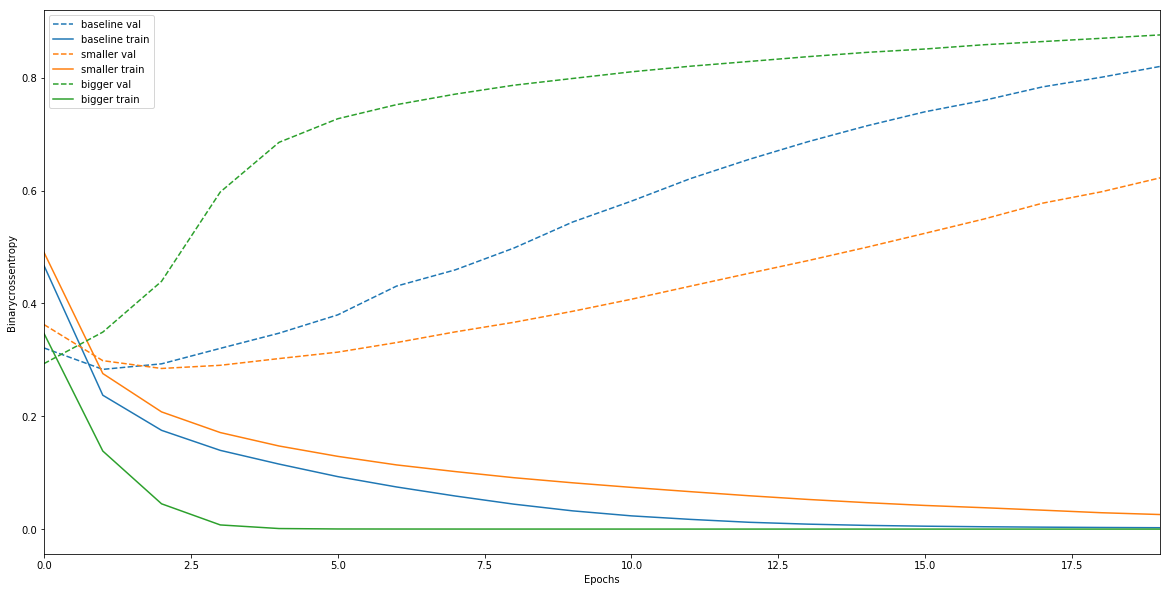

In [25]:
plot_history([("baseline",baseline_history),
             ("smaller",smaller_history),
             ("bigger",bigger_history)])

观察上图，模型越复杂，越容易过拟合,虚线的上升点就是过拟合开始的起点

## 优化策略 

### 正则化 

In [26]:
# 添加权重惩罚，减少模型复杂度
def build_smaller_l2_model():
    # 隐藏层每层4个神经元,添加 L2 正则，0.001 是正则化公式的λ 超参
    # 添加正则化后，训练时间加长了，相当于 baseline_model 的时间
    model = keras.Sequential([
        keras.layers.Dense(4,activation = tf.nn.relu,input_shape=(NUM_WORDS,),kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(4,activation=tf.nn.relu,kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(1,activation=tf.nn.sigmoid)
    ])
    
    model.compile(optimizer="adam",
                 loss="binary_crossentropy",
                 metrics=['accuracy', 'binary_crossentropy'])
    return model

l2_smaller_model = build_smaller_l2_model()
l2_smaller_history = l2_smaller_model.fit(train_data,train_label,epochs=20,batch_size=512,validation_data=(test_data,test_label),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 11s - loss: 0.6051 - acc: 0.7600 - binary_crossentropy: 0.5941 - val_loss: 0.5103 - val_acc: 0.8404 - val_binary_crossentropy: 0.4973
Epoch 2/20
 - 5s - loss: 0.4288 - acc: 0.8740 - binary_crossentropy: 0.4119 - val_loss: 0.4050 - val_acc: 0.8698 - val_binary_crossentropy: 0.3838
Epoch 3/20
 - 4s - loss: 0.3430 - acc: 0.8963 - binary_crossentropy: 0.3181 - val_loss: 0.3587 - val_acc: 0.8805 - val_binary_crossentropy: 0.3303
Epoch 4/20
 - 4s - loss: 0.2990 - acc: 0.9108 - binary_crossentropy: 0.2678 - val_loss: 0.3380 - val_acc: 0.8854 - val_binary_crossentropy: 0.3044
Epoch 5/20
 - 5s - loss: 0.2734 - acc: 0.9210 - binary_crossentropy: 0.2376 - val_loss: 0.3294 - val_acc: 0.8868 - val_binary_crossentropy: 0.2918
Epoch 6/20
 - 5s - loss: 0.2559 - acc: 0.9267 - binary_crossentropy: 0.2167 - val_loss: 0.3271 - val_acc: 0.8861 - val_binary_crossentropy: 0.2865
Epoch 7/20
 - 5s - loss: 0.2436 - acc: 0.9326 - binary_crossentropy

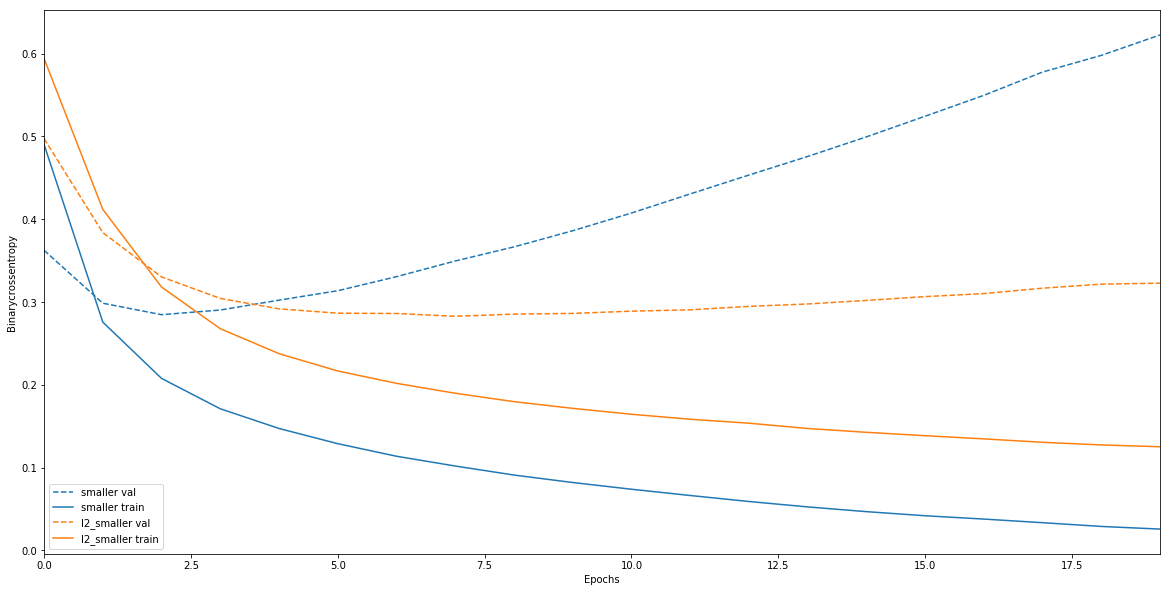

In [27]:
plot_history([("smaller",smaller_history),
             ("l2_smaller",l2_smaller_history)])

很明显，加上 L2 后，过拟合点从 2 epoch 移到了10 epoch

### 添加 Dropout 

In [31]:
# 在神经网络的训练过程中，随机丢弃一些神经元，防止网络完美模拟噪声，类似随机森林的概念

def build_smaller_l2_model_dropout():
    # 添加 dropout 耗费时间很少
    model = keras.Sequential([
        keras.layers.Dense(4,activation = tf.nn.relu,input_shape=(NUM_WORDS,),kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4,activation=tf.nn.relu,kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1,activation=tf.nn.sigmoid)
    ])
    
    model.compile(optimizer="adam",
                 loss="binary_crossentropy",
                 metrics=['accuracy', 'binary_crossentropy'])
    return model

l2_smaller_model_dropout = build_smaller_l2_model_dropout()
l2_smaller_dropout_history = l2_smaller_model_dropout.fit(train_data,train_label,epochs=30,batch_size=512,validation_data=(test_data,test_label),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/30
 - 5s - loss: 0.6719 - acc: 0.5822 - binary_crossentropy: 0.6625 - val_loss: 0.6095 - val_acc: 0.8239 - val_binary_crossentropy: 0.5999
Epoch 2/30
 - 4s - loss: 0.6035 - acc: 0.6583 - binary_crossentropy: 0.5929 - val_loss: 0.5349 - val_acc: 0.8625 - val_binary_crossentropy: 0.5232
Epoch 3/30
 - 5s - loss: 0.5672 - acc: 0.6821 - binary_crossentropy: 0.5544 - val_loss: 0.4878 - val_acc: 0.8788 - val_binary_crossentropy: 0.4739
Epoch 4/30
 - 5s - loss: 0.5410 - acc: 0.7124 - binary_crossentropy: 0.5259 - val_loss: 0.4595 - val_acc: 0.8842 - val_binary_crossentropy: 0.4433
Epoch 5/30
 - 5s - loss: 0.5206 - acc: 0.7428 - binary_crossentropy: 0.5034 - val_loss: 0.4317 - val_acc: 0.8869 - val_binary_crossentropy: 0.4135
Epoch 6/30
 - 5s - loss: 0.5092 - acc: 0.7501 - binary_crossentropy: 0.4901 - val_loss: 0.4112 - val_acc: 0.8877 - val_binary_crossentropy: 0.3911
Epoch 7/30
 - 5s - loss: 0.5032 - acc: 0.7578 - binary_crossentropy:

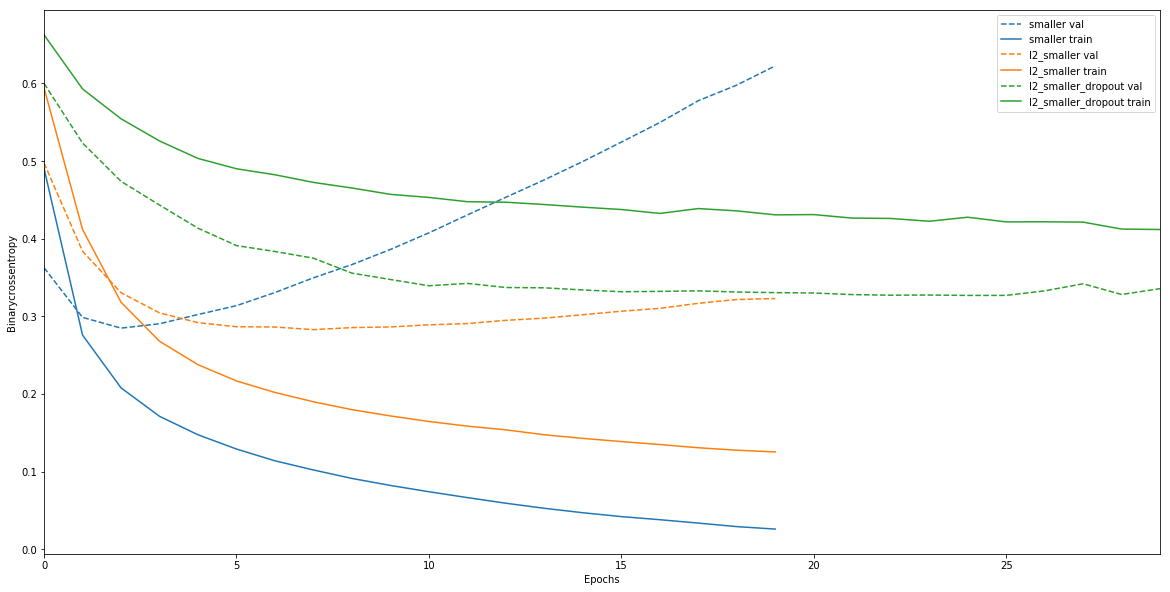

In [32]:
plot_history([("smaller",smaller_history),
             ("l2_smaller",l2_smaller_history),
            ("l2_smaller_dropout",l2_smaller_dropout_history)])

看上图，对比很明显了，在 L2 的基础上增加 dropout 层 